In [7]:
import random

REWARD_CLICK = 1
REWARD_NO_CLICK = 0


class WebsiteEnvironmentSimple:
    def __init__(self, proba):
        self.proba = proba

    def do(self, action):
        reward = REWARD_CLICK if random.random() < self.proba[action] else REWARD_NO_CLICK
        return reward

In [8]:
from abc import ABC, abstractmethod


class BanditBase(ABC):
    def __init__(self, K, env):
        self.arms = list(range(K))
        self.env = env
        self.history = []

    @abstractmethod
    def get_action(self):
        raise NotImplementedError()

    def update(self, arm, reward):
        self.history.append([arm, reward])
        self._update(arm, reward)

    @abstractmethod
    def _update(self, arm, reward):
        raise NotImplementedError()


In [71]:
import random
import numpy as np

class EpsilonGreedyBandit(BanditBase):
    def __init__(self, ϵ, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.ϵ = ϵ
        self.rewards = {arm: [] for arm in self.arms}
    
    def get_action(self):
        if random.random() < self.ϵ:
            action = random.choice(self.arms)
        else:
            action = np.argmax([np.mean(arm_rewards) for arm_rewards in self.rewards.values()])
        
        return action
    
    def _update(self, arm, reward):
        self.rewards[arm].append(reward)

In [72]:
conversion_rates = [0.15, 0.13]
env = WebsiteEnvironmentSimple(conversion_rates)

In [73]:
bandit = EpsilonGreedyBandit(ϵ=0.3, K=2, env=env)

In [74]:
for _ in range(10_000):
    action = bandit.get_action()
    reward = env.do(action)
    bandit.update(action, reward)

C:\Users\rutger\miniconda3\envs\pomp\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\rutger\miniconda3\envs\pomp\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [75]:
np.mean(bandit.rewards[0])

0.14864197530864198

In [76]:
np.mean(bandit.rewards[1])

0.12105263157894737

In [77]:
import pandas as pd

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\rutger\AppData\Local\Temp\ipykernel_772\2194647022.py:4: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(np.cumsum(bandit.rewards[0]) / np.linspace(0, n, n))


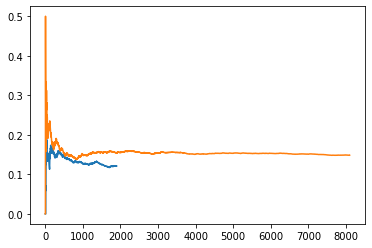

In [79]:
n = len(bandit.rewards[1])
plt.plot(np.cumsum(bandit.rewards[1]) / np.linspace(1, n, n))
n = len(bandit.rewards[0])
plt.plot(np.cumsum(bandit.rewards[0]) / np.linspace(0, n, n))